In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# **Linear Regression Model for House Price Prediction**

**Importing Neccessary Libraries**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

**Loading Dataset**

In [27]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
print(f"size of dataframe is {df.shape}")
df.head()

size of dataframe is (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Feature Extraction**
getting important features from all data

'GrLivArea':Above grade (ground) living area square feet, 'BedroomAbvGr': Number of bedrooms above basement level, 'FullBath': Full bathrooms above grade, 'OverallQual', 'TotalBsmtSF':Total square feet of basement area , 'GarageCars': Size of garage in car capacity, 'GarageArea':Size of garage in square feet, 'YearBuilt':Original construction date, '1stFlrSF':First Floor square feet, 'TotRmsAbvGrd':Total rooms above grade (does not include bathrooms), 'SalePrice':the property's sale price in dollars(TARGET VARIABLE).

In [32]:
df_features=['GrLivArea','BedroomAbvGr','FullBath','OverallQual','TotalBsmtSF','GarageCars','GarageArea','YearBuilt','1stFlrSF','TotRmsAbvGrd','SalePrice']
data=df[df_features]
print(f"Size of dataframe is {data.shape}")
data.head()

Size of dataframe is (1460, 11)


,GrLivArea,BedroomAbvGr,FullBath,OverallQual,TotalBsmtSF,GarageCars,GarageArea,YearBuilt,1stFlrSF,TotRmsAbvGrd,SalePrice
0,1710,3,2,7,856,2,548,2003,856,8,208500
1,1262,3,2,6,1262,2,460,1976,1262,6,181500
2,1786,3,2,7,920,2,608,2001,920,6,223500
3,1717,3,1,7,756,3,642,1915,961,7,140000
4,2198,4,2,8,1145,3,836,2000,1145,9,250000


In [33]:
df.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   OverallQual   1460 non-null   int64
 4   TotalBsmtSF   1460 non-null   int64
 5   GarageCars    1460 non-null   int64
 6   GarageArea    1460 non-null   int64
 7   YearBuilt     1460 non-null   int64
 8   1stFlrSF      1460 non-null   int64
 9   TotRmsAbvGrd  1460 non-null   int64
 10  SalePrice     1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


**Preprocessing**

In [34]:
# 1 Handling Null values
data.isnull().sum()
# No null values

GrLivArea       0
BedroomAbvGr    0
FullBath        0
OverallQual     0
TotalBsmtSF     0
GarageCars      0
GarageArea      0
YearBuilt       0
1stFlrSF        0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64

In [35]:
#Handling duplicate values
data.duplicated()
#no duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

**Visualisation** 
Correlation between features

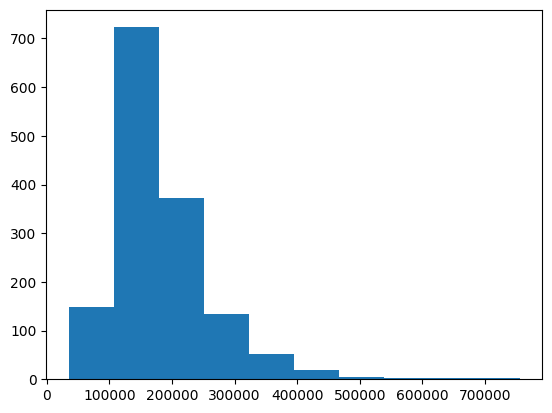

In [31]:
plt.hist(data['SalePrice']) #histogram of saleprice
plt.show()

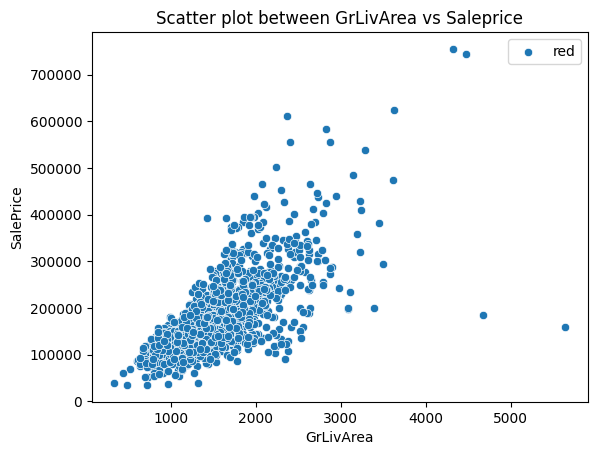

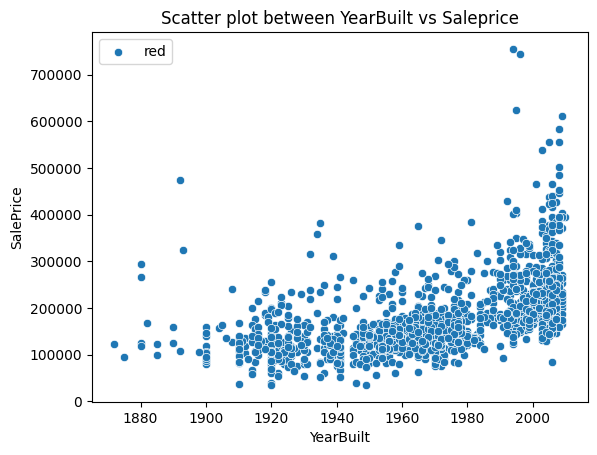

In [41]:
features=['GrLivArea','YearBuilt']
for f in features:
    plt.figure() # create new figure everytime
    sns.scatterplot(data=data,x=f,y='SalePrice')
    plt.title(f"Scatter plot between {f} vs Saleprice")
    plt.show()

<Axes: >

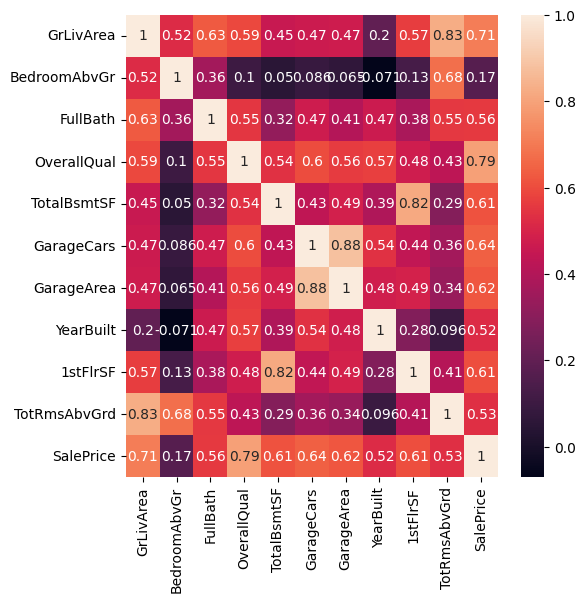

In [45]:
plt.figure(figsize=(6,6))       #relation between the features
sns.heatmap(data.corr(),annot=True)

**Data Scaling**

In [48]:
features_to_scale=['GrLivArea','BedroomAbvGr','FullBath','OverallQual','TotalBsmtSF','GarageCars','GarageArea','YearBuilt','1stFlrSF','TotRmsAbvGrd']
scaler=StandardScaler()
data[features_to_scale]=scaler.fit_transform(data[features_to_scale])
data.head()

,GrLivArea,BedroomAbvGr,FullBath,OverallQual,TotalBsmtSF,GarageCars,GarageArea,YearBuilt,1stFlrSF,TotRmsAbvGrd,SalePrice
0,0.370333,0.163779,0.789741,0.651479,-0.459303,0.311725,0.351000,1.050994,-0.793434,0.912210,208500
1,-0.482512,0.163779,0.789741,-0.071836,0.466465,0.311725,-0.060731,0.156734,0.257140,-0.318683,181500
2,0.515013,0.163779,0.789741,0.651479,-0.313369,0.311725,0.631726,0.984752,-0.627826,-0.318683,223500
3,0.383659,0.163779,-1.026041,0.651479,-0.687324,1.650307,0.790804,-1.863632,-0.521734,0.296763,140000
4,1.299326,1.390023,0.789741,1.374795,0.199680,1.650307,1.698485,0.951632,-0.045611,1.527656,250000


**Model Building**

In [49]:
x=data.drop(['SalePrice'],axis=1)
y=data['SalePrice']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42,test_size=0.3)

In [51]:
model=LinearRegression()
model.fit(xtrain,ytrain)
y_predicted=model.predict(xtest)

In [57]:
#calculate Mean Square Error MSE
mse=mean_squared_error(ytest,y_predicted)
print(f"Mean Square Error is : {mse:.2f}")

#calculate Root Mean Square Error rMSE
rmse=np.sqrt(mse)
print(f"Root Mean Square Error is : {rmse:.2f}")

#calculate Mean Absolute Error MAE
mae=mean_absolute_error(ytest,y_predicted)
print(f"Mean Absolute Error is : {mae:.2f}")

#calculate R2score
rsc=r2_score(ytest,y_predicted)
print(f"Rsquared Score is : {rsc:.2f}")

Mean Square Error is : 1364254106.11
Root Mean Square Error is : 36935.81
Mean Absolute Error is : 24699.94
R2 Score is : 0.80


**Prediction**

In [58]:
features = [
    'GrLivArea', 'BedroomAbvGr', 'FullBath', 'OverallQual',
    'TotalBsmtSF', 'GarageCars', 'GarageArea',
    'YearBuilt', '1stFlrSF', 'TotRmsAbvGrd'
]

new_data = {
    'GrLivArea': [1500],  # Example: 1500 sq ft above ground
    'BedroomAbvGr': [3],   # Example: 3 bedrooms
    'FullBath': [2],       # Example: 2 full bathrooms
    'OverallQual': [7],    # Example: Overall quality score of 7
    'TotalBsmtSF': [1000], # Example: 1000 sq ft basement area
    'GarageCars': [2],     # Example: 2 car garage capacity
    'GarageArea': [500],   # Example: 500 sq ft garage area
    'YearBuilt': [2010],   # Example: Built in 2010
    '1stFlrSF': [1500],    # Example: 1500 sq ft on the first floor
    'TotRmsAbvGrd': [7]    # Example: 7 total rooms above ground
}

# Convert the dictionary to a pandas DataFrame
new_data_df = pd.DataFrame(new_data, columns=features)


# Predict the SalePrice for the new data point
predicted_price = model.predict(new_data_df)

# Print the predicted price
print(f"The predicted SalePrice for the new data point is: ${predicted_price[0]:,.2f}")
     

The predicted SalePrice for the new data point is: $73,121,880.24
